In [1]:
import numpy as np
import torch
from torch import nn
import pandas as pd
from matplotlib import pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
import torchvision
from torchvision import transforms, datasets
from torchvision.transforms import ToTensor

In [2]:
# Setup training data

train_data = datasets.FashionMNIST(
    root = "data",
    train= True,
    download = True,
    transform = ToTensor(),
    target_transform = None

)

test_data = datasets.FashionMNIST(
    root = "data",
    train= False,
    download = True,
    transform = ToTensor(),
    target_transform = None

)

100%|██████████| 26421880/26421880 [00:01<00:00, 17497033.26it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 301681.94it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:00<00:00, 5620405.03it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 6044870.38it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [3]:
train_data, test_data

(Dataset FashionMNIST
     Number of datapoints: 60000
     Root location: data
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset FashionMNIST
     Number of datapoints: 10000
     Root location: data
     Split: Test
     StandardTransform
 Transform: ToTensor())

In [4]:
image, label = train_data[0]

In [7]:
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [6]:
class_name =train_data.classes
print(class_name)

['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


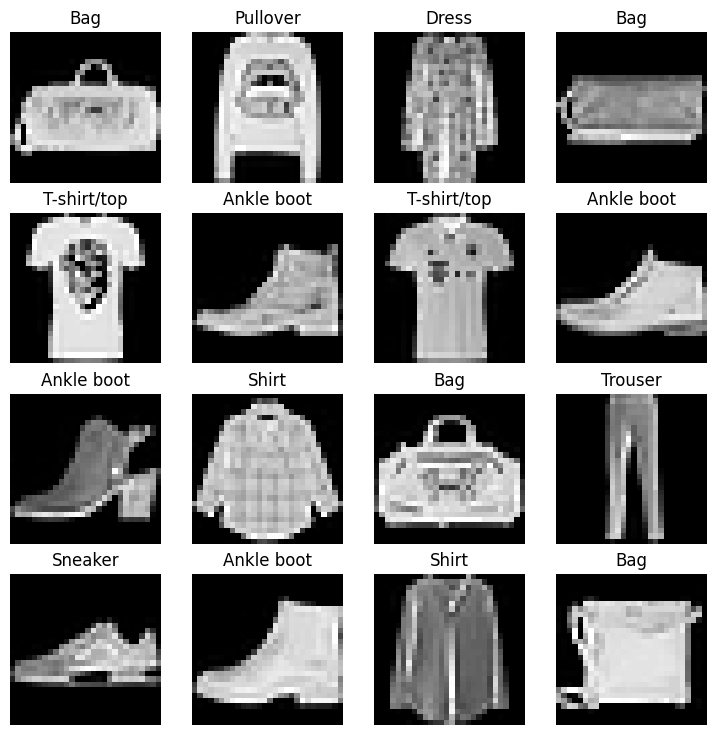

In [8]:
# plot more images

# torch.manual_seed(42)
fig = plt.figure(figsize =(9,9))
rows, cols = 4,4
for i in range(1, rows*cols+1):
  random_idx = torch.randint(0, len(train_data), size =[1]).item()
  img, label = train_data[random_idx]
  fig.add_subplot(rows, cols, i)
  plt.imshow(img.squeeze(), cmap= "gray")
  plt.title(class_name[label])
  plt.axis(False)

In [9]:
from torch.utils.data import DataLoader

train_data_loader = DataLoader(dataset= train_data,
                               batch_size = 32,
                               shuffle = True)

test_data_loader = DataLoader(dataset = test_data,
                              batch_size =32,
                              shuffle = False)

train_data_loader,

(<torch.utils.data.dataloader.DataLoader at 0x7ecebc4e8a00>,)

In [11]:
from torch import nn

class FashionMNISTModelV0(nn.Module):
    def __init__(
        self,
        input_shape: int,
        hidden_units: int,
        output_shape: int,
    ):
        super(FashionMNISTModelV0, self).__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape, out_features=hidden_units),
            nn.Linear(in_features=hidden_units, out_features=output_shape)
        )

    def forward(self, x):
        return self.layer_stack(x)


In [12]:
torch.manual_seed(42)

model_0 = FashionMNISTModelV0(
    input_shape = 28 *28,
    hidden_units =10,
    output_shape = len(class_name)
)

model_0.to("cuda")

model_0

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [ ]:
model_0.state_dict()

In [14]:
import requests
from pathlib import Path

if Path("helper_functions.py").is_file():
  print("Helper function already exists")
else:
  print("Downloading file")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_function.py", "wb") as f:
    f.write(request.content)




In [15]:
# import accuracy metric

from helper_function import accuracy_fn

In [66]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params = model1.parameters(),lr =0.1)

In [61]:
from sklearn.metrics import precision_recall_fscore_support

def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn):

    loss, acc = 0, 0
    all_true_labels, all_predicted_labels = [], []

    model.eval()
    with torch.inference_mode():
        for X, y in data_loader:
            X = X.to("cuda")
            y = y.to("cuda")
            y_pred = model(X)

            # Use detach() to avoid in-place update error
            loss += loss_fn(y_pred, y).detach()
            acc += accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1))

            all_true_labels.extend(y.cpu().numpy())
            all_predicted_labels.extend(y_pred.argmax(dim=1).cpu().numpy())

        # Scale loss and acc to find the average loss/acc per batch
        loss /= len(data_loader)
        acc /= len(data_loader)

    # Calculate Precision, Recall, and F1
    precision, recall, f1, _ = precision_recall_fscore_support(
        all_true_labels, all_predicted_labels, average='weighted', zero_division=0
    )

    return {
        "model_name": model.__class__.__name__,
        "model_loss": loss.item(),
        "model_acc": acc,
        "precision": precision,
        "recall": recall,
        "f1": f1
    }


In [62]:
model_0_results = eval_model(model1, test_data_loader,
                             loss_fn, accuracy_fn)
model_0_results

{'model_name': 'Sequential',
 'model_loss': 6.591240406036377,
 'model_acc': 0.16972843450479233,
 'precision': 0.04,
 'recall': 0.0016,
 'f1': 0.0030769230769230765}

In [63]:

def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device):
    train_loss, train_acc = 0, 0
    for batch, (X, y) in enumerate(data_loader):
        # Send data to GPU
        X, y = X.to(device), y.to(device)

        # 1. Forward pass
        y_pred = model(X)

        # 2. Calculate loss
        loss = loss_fn(y_pred, y)
        train_loss += loss
        train_acc += accuracy_fn(y_true=y,
                                 y_pred=y_pred.argmax(dim=1)) # Go from logits -> pred labels

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

    # Calculate loss and accuracy per epoch and print out what's happening
    train_loss /= len(data_loader)
    train_acc /= len(data_loader)
    print(f"Train loss: {train_loss:.5f} | Train accuracy: {train_acc:.2f}%")

def test_step(data_loader: torch.utils.data.DataLoader,
              model: torch.nn.Module,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device = device):
    test_loss, test_acc = 0, 0
    model.eval() # put model in eval mode
    # Turn on inference context manager
    with torch.inference_mode():
        for X, y in data_loader:
            # Send data to GPU
            X, y = X.to(device), y.to(device)

            # 1. Forward pass
            test_pred = model(X)

            # 2. Calculate loss and accuracy
            test_loss += loss_fn(test_pred, y)
            test_acc += accuracy_fn(y_true=y,
                y_pred=test_pred.argmax(dim=1) # Go from logits -> pred labels
            )

        # Adjust metrics and print out
        test_loss /= len(data_loader)
        test_acc /= len(data_loader)
        print(f"Test loss: {test_loss:.5f} | Test accuracy: {test_acc:.2f}%\n")

In [70]:
torch.manual_seed(42)
from tqdm import tqdm
epochs = 10


# device = "cuda" if torch.cuda.is_available() else "cpu"
# Move the model to the desired device before the training loop
# model1 = model1.to(device)

for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}")

    train_step(model=model1, data_loader=train_data_loader,
               loss_fn=loss_fn, optimizer=optimizer,
               accuracy_fn=accuracy_fn, device=device)

    test_step(model=model1, data_loader=test_data_loader,
              loss_fn=loss_fn, accuracy_fn=accuracy_fn,
              device=device)


  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 0
Train loss: 0.43082 | Train accuracy: 84.65%


 10%|█         | 1/10 [00:12<01:48, 12.09s/it]

Test loss: 0.45603 | Test accuracy: 84.48%

Epoch: 1
Train loss: 0.42347 | Train accuracy: 84.83%


 20%|██        | 2/10 [00:22<01:27, 10.88s/it]

Test loss: 0.46193 | Test accuracy: 84.12%

Epoch: 2
Train loss: 0.41529 | Train accuracy: 85.23%


 30%|███       | 3/10 [00:31<01:11, 10.26s/it]

Test loss: 0.46443 | Test accuracy: 83.88%

Epoch: 3
Train loss: 0.40958 | Train accuracy: 85.22%


 40%|████      | 4/10 [00:41<01:01, 10.18s/it]

Test loss: 0.46448 | Test accuracy: 83.73%

Epoch: 4
Train loss: 0.40621 | Train accuracy: 85.34%


 50%|█████     | 5/10 [00:51<00:50, 10.13s/it]

Test loss: 0.46556 | Test accuracy: 83.46%

Epoch: 5
Train loss: 0.40147 | Train accuracy: 85.64%


 60%|██████    | 6/10 [01:09<00:50, 12.59s/it]

Test loss: 0.47532 | Test accuracy: 83.28%

Epoch: 6
Train loss: 0.39779 | Train accuracy: 85.70%


 70%|███████   | 7/10 [01:24<00:40, 13.49s/it]

Test loss: 0.44895 | Test accuracy: 84.13%

Epoch: 7
Train loss: 0.39561 | Train accuracy: 85.72%


 80%|████████  | 8/10 [01:43<00:30, 15.41s/it]

Test loss: 0.43957 | Test accuracy: 84.26%

Epoch: 8
Train loss: 0.39350 | Train accuracy: 85.78%


 90%|█████████ | 9/10 [01:59<00:15, 15.37s/it]

Test loss: 0.44228 | Test accuracy: 84.60%

Epoch: 9
Train loss: 0.39200 | Train accuracy: 85.84%


100%|██████████| 10/10 [02:15<00:00, 13.58s/it]

Test loss: 0.43928 | Test accuracy: 84.50%



In [29]:
# Buliding CNN

In [65]:
model1 = nn.Sequential(
    nn.Flatten(),
    nn.Linear(in_features=784,out_features=10),
    nn.ReLU(),
    nn.Linear(in_features=10,out_features=784),
    nn.ReLU()

)


In [68]:
model1.to("cuda")

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=784, out_features=10, bias=True)
  (2): ReLU()
  (3): Linear(in_features=10, out_features=784, bias=True)
  (4): ReLU()
)

In [118]:
import torch.nn as nn

class FashionMNISTModelV2(nn.Module):

    def __init__(self, input_shape:int, hidden_units:int, output_shape:int):
        super().__init__()
        self.conv_block1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1, padding=1),
            nn.ReLU(),

            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1, padding=1),
            nn.ReLU(),

            nn.MaxPool2d(kernel_size=2)
        )

        self.conv_block2 = nn.Sequential(
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1, padding=1),
            nn.ReLU(),

            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1, padding=1),
            nn.ReLU(),

            nn.MaxPool2d(kernel_size=2)
        )

        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units*7*7 ,  # You may want to fix this line
                      out_features=output_shape)
        )

    def forward(self, x):
        x = self.conv_block1(x)
        # print(x.shape)
        x = self.conv_block2(x)
        # print(x.shape)
        x = self.classifier(x)
        # print(x.shape)
        return x


In [119]:
torch.manual_seed(42)
model_2 = FashionMNISTModelV2(input_shape = 1,
                              hidden_units = 10,
                              output_shape = len(class_name)


                              ).to(device)

In [110]:
image.shape

torch.Size([1, 28, 28])

In [111]:
torch.manual_seed(42)

images = torch.randn(size = (32,3,64,64))
test_image = images[0]
print(test_image.shape)
print(test_image)

torch.Size([3, 64, 64])
tensor([[[ 1.9269,  1.4873,  0.9007,  ...,  1.8446, -1.1845,  1.3835],
         [ 1.4451,  0.8564,  2.2181,  ...,  0.3399,  0.7200,  0.4114],
         [ 1.9312,  1.0119, -1.4364,  ..., -0.5558,  0.7043,  0.7099],
         ...,
         [-0.5610, -0.4830,  0.4770,  ..., -0.2713, -0.9537, -0.6737],
         [ 0.3076, -0.1277,  0.0366,  ..., -2.0060,  0.2824, -0.8111],
         [-1.5486,  0.0485, -0.7712,  ..., -0.1403,  0.9416, -0.0118]],

        [[-0.5197,  1.8524,  1.8365,  ...,  0.8935, -1.5114, -0.8515],
         [ 2.0818,  1.0677, -1.4277,  ...,  1.6612, -2.6223, -0.4319],
         [-0.1010, -0.4388, -1.9775,  ...,  0.2106,  0.2536, -0.7318],
         ...,
         [ 0.2779,  0.7342, -0.3736,  ..., -0.4601,  0.1815,  0.1850],
         [ 0.7205, -0.2833,  0.0937,  ..., -0.1002, -2.3609,  2.2465],
         [-1.3242, -0.1973,  0.2920,  ...,  0.5409,  0.6940,  1.8563]],

        [[-0.7978,  1.0261,  1.1465,  ...,  1.2134,  0.9354, -0.0780],
         [-1.4647, -1

In [112]:
test_image.shape

torch.Size([3, 64, 64])

In [113]:
# create a single conv2d layer

conv_layer = nn.Conv2d(in_channels =3,
                       out_channels = 10,
                       kernel_size = 3,
                       stride =1 , padding=0
                       )

# Pass the data

conv_output = conv_layer(test_image)
print(conv_output.shape)

torch.Size([10, 62, 62])


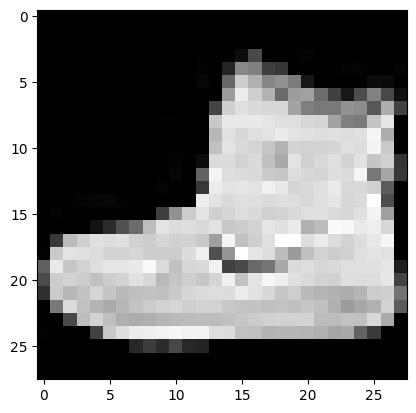

In [114]:
plt.imshow(image.squeeze(), cmap= "gray")

In [ ]:
rand_image_tensor = torch.randn(size =(1,28,28))
rand_image_tensor.to(device)


In [116]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

# Move the model to the specified device
model_2.to(device)

# Generate a random image tensor
rand_image_tensor =rand_image_tensor.to(device)

# Ensure the model and input tensor are on the same device
model_output = model_2(rand_image_tensor.unsqueeze(0))

torch.Size([1, 10, 14, 14])
torch.Size([1, 10, 7, 7])
torch.Size([1, 10])


In [120]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params = model_2.parameters(),
                            lr =0.1)

In [122]:
import torch
from tqdm import tqdm
import time

torch.manual_seed(42)

# Define your model, loss function, optimizer, and data loaders

epochs = 10
device = "cuda" if torch.cuda.is_available() else "cpu"

# Move the model to the desired device before the training loop
model_2 = model_2.to(device)

start_time = time.time()

for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}")

    # Train step
    train_step(model=model_2, data_loader=train_data_loader,
               loss_fn=loss_fn, optimizer=optimizer,
               accuracy_fn=accuracy_fn, device=device)

    # Test step
    test_step(model=model_2, data_loader=test_data_loader,
              loss_fn=loss_fn, accuracy_fn=accuracy_fn,
              device=device)

end_time = time.time()
elapsed_time = end_time - start_time

print(f"Training took {elapsed_time:.2f} seconds")


  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 0
Train loss: 0.30408 | Train accuracy: 88.96%


 10%|█         | 1/10 [00:13<01:57, 13.09s/it]

Test loss: 0.32814 | Test accuracy: 88.29%

Epoch: 1
Train loss: 0.28933 | Train accuracy: 89.56%


 20%|██        | 2/10 [00:25<01:39, 12.46s/it]

Test loss: 0.30341 | Test accuracy: 89.10%

Epoch: 2
Train loss: 0.28206 | Train accuracy: 89.80%


 30%|███       | 3/10 [00:37<01:25, 12.28s/it]

Test loss: 0.30518 | Test accuracy: 88.85%

Epoch: 3
Train loss: 0.27249 | Train accuracy: 90.13%


 40%|████      | 4/10 [00:52<01:20, 13.41s/it]

Test loss: 0.30744 | Test accuracy: 89.13%

Epoch: 4
Train loss: 0.26510 | Train accuracy: 90.43%


 50%|█████     | 5/10 [01:20<01:33, 18.76s/it]

Test loss: 0.29317 | Test accuracy: 89.66%

Epoch: 5
Train loss: 0.25848 | Train accuracy: 90.57%


 60%|██████    | 6/10 [01:45<01:23, 20.92s/it]

Test loss: 0.28407 | Test accuracy: 90.04%

Epoch: 6
Train loss: 0.25325 | Train accuracy: 90.78%


 70%|███████   | 7/10 [01:58<00:54, 18.17s/it]

Test loss: 0.28555 | Test accuracy: 89.82%

Epoch: 7
Train loss: 0.24993 | Train accuracy: 90.97%


 80%|████████  | 8/10 [02:10<00:32, 16.29s/it]

Test loss: 0.28302 | Test accuracy: 89.76%

Epoch: 8
Train loss: 0.24485 | Train accuracy: 91.09%


 90%|█████████ | 9/10 [02:22<00:15, 15.08s/it]

Test loss: 0.27359 | Test accuracy: 90.04%

Epoch: 9
Train loss: 0.24149 | Train accuracy: 91.21%


100%|██████████| 10/10 [02:34<00:00, 15.49s/it]

Test loss: 0.30092 | Test accuracy: 89.49%

Training took 154.95 seconds


In [124]:
model_2_results = eval_model(model=model_2,
                             data_loader = test_data_loader,
                             loss_fn = loss_fn, accuracy_fn = accuracy_fn,
                             )

In [125]:
model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.30092281103134155,
 'model_acc': 89.48682108626198,
 'precision': 0.8944361784696526,
 'recall': 0.8949,
 'f1': 0.8936009780482685}

In [136]:
model_0_results = eval_model(model=model_0,
                             data_loader = test_data_loader,
                             loss_fn = loss_fn, accuracy_fn = accuracy_fn,
                             )

In [137]:
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.4609110653400421,
 'model_acc': 83.4564696485623,
 'precision': 0.8376492137765,
 'recall': 0.8347,
 'f1': 0.8351114388923626}

In [138]:
from tabulate import tabulate

results = [
    model_1_results,
    model_2_results,
    model_0_results

]

table = tabulate(results, headers="keys", tablefmt="github")

print(table)


| model_name          |   model_loss |   model_acc |   precision |   recall |       f1 |
|---------------------|--------------|-------------|-------------|----------|----------|
| Sequential          |     0.439283 |     84.5048 |    0.843981 |   0.8451 | 0.8426   |
| FashionMNISTModelV2 |     0.300923 |     89.4868 |    0.894436 |   0.8949 | 0.893601 |
| FashionMNISTModelV0 |     0.460911 |     83.4565 |    0.837649 |   0.8347 | 0.835111 |


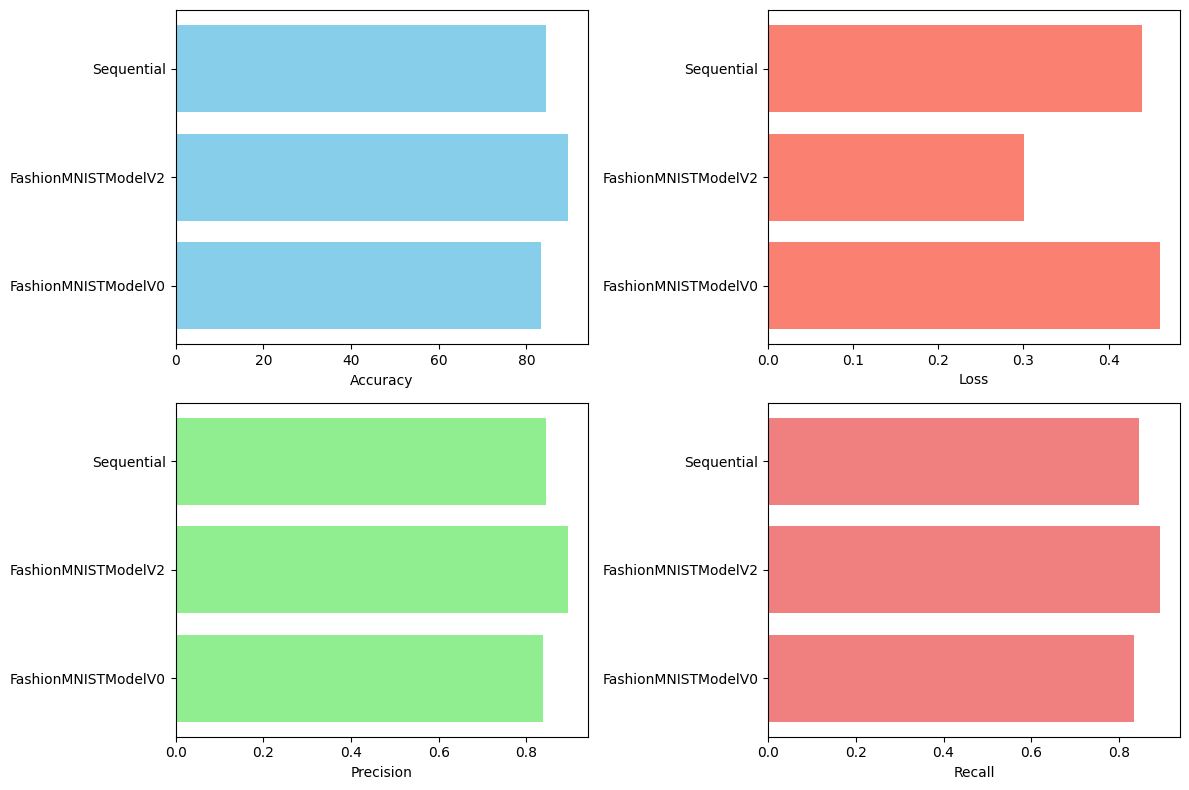

In [140]:
results = [model_1_results, model_2_results, model_0_results]

# Extract relevant information for plotting
model_names = [result['model_name'] for result in results]
accuracy_values = [result['model_acc'] for result in results]
loss_values = [result['model_loss'] for result in results]
precision_values = [result['precision'] for result in results]
recall_values = [result['recall'] for result in results]

# Plotting
fig, ax = plt.subplots(2, 2, figsize=(12, 8))

def plot_horizontal_bar(ax, values, labels, title, color):
    y_pos = np.arange(len(labels))
    ax.barh(y_pos, values, color=color)
    ax.set_yticks(y_pos)
    ax.set_yticklabels(labels)
    ax.set_xlabel(title)
    ax.invert_yaxis()

plot_horizontal_bar(ax[0, 0], accuracy_values, model_names, 'Accuracy', 'skyblue')
plot_horizontal_bar(ax[0, 1], loss_values, model_names, 'Loss', 'salmon')
plot_horizontal_bar(ax[1, 0], precision_values, model_names, 'Precision', 'lightgreen')
plot_horizontal_bar(ax[1, 1], recall_values, model_names, 'Recall', 'lightcoral')

plt.tight_layout()
plt.show()


In [141]:
# Making predictions on random test samples

In [169]:
def make_predictions(model:nn.Module,
                     data:list,
                     device: torch.device = device):
  pred_probs = []
  model.to(device)
  model.eval()
  with torch.inference_mode():
    for sample in data:
      sample = torch.unsqueeze(sample, dim=0).to(device)

      pred_logit = model(sample)


      # get prediction probability

      pred_prob = torch.softmax(pred_logit.squeeze(), dim=0)

      pred_probs.append(pred_prob.cpu())

  return torch.stack(pred_probs)


In [170]:
import random
random.seed(42)
test_samples = []
test_labels = []
for sample, label in random.sample(list(test_data), k =9):
  test_samples.append(sample)
  test_labels.append(label)

  test_samples[0].shape



Text(0.5, 1.0, 'Sandal')

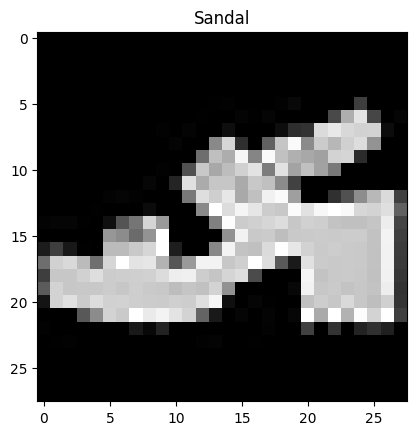

In [171]:
plt.imshow(test_samples[0].squeeze(), cmap = 'gray')
plt.title(class_name[test_labels[0]])

Make prediction

In [172]:
pred_probs = make_predictions(model = model_2,
                              data = test_samples)

pred_probs[:2]

tensor([[4.7993e-11, 2.2091e-12, 7.8051e-11, 2.0531e-12, 6.5694e-11, 1.0000e+00,
         8.9473e-11, 5.7396e-08, 7.0192e-08, 4.7837e-07],
        [7.4868e-03, 9.8462e-01, 7.7421e-05, 2.5865e-03, 3.9283e-03, 2.9383e-06,
         1.1673e-03, 1.3171e-05, 9.3808e-05, 2.0069e-05]])

In [173]:
# convert prediction probs to labels

pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([5, 1, 7, 2, 3, 6, 4, 7, 1])

Plot images alongside predictions

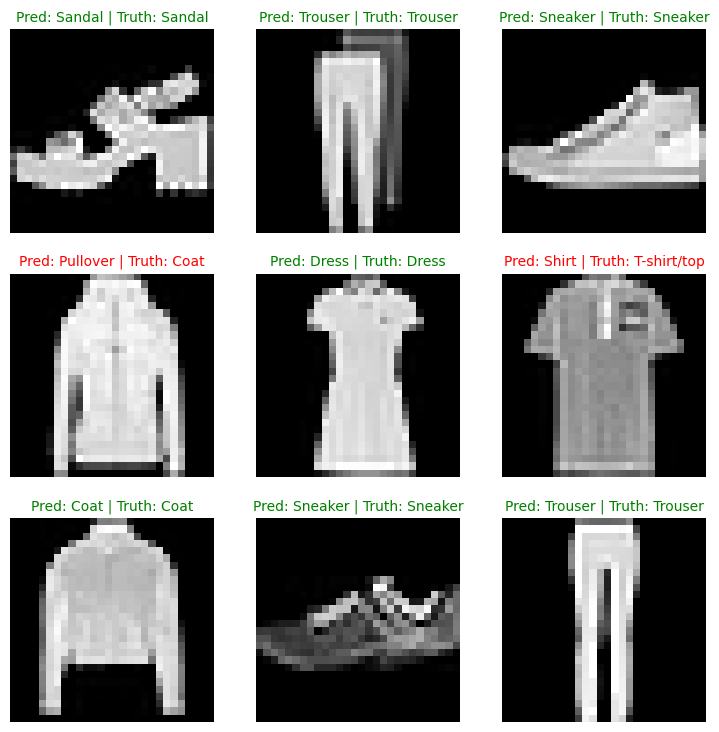

In [174]:
plt.figure(figsize =(9,9))
nrows =3
ncols =3
for i, sample in enumerate(test_samples):
  plt.subplot(nrows, ncols, i+1)
  plt.imshow(sample.squeeze(), cmap= "gray")

  plt.axis(False)

  # Find prediction label
  pred_label = class_name[pred_classes[i]]

  truth_label = class_name[test_labels[i]]

  title_text = f"Pred: {pred_label} | Truth: {truth_label}"

  if pred_label == truth_label:
    plt.title(title_text, fontsize =10, c ="g")
  else:
    plt.title(title_text, fontsize =10, c ="r")





In [181]:
from tqdm.auto import tqdm

y_preds = []
model_2.eval()
with torch.inference_mode():
  for X, y in tqdm(test_data_loader, desc="Making Predictions..."):
    X, y = X.to(device), y.to(device)

    y_logit = model_2(X)

    y_pred = torch.softmax(y_logit.squeeze(), dim=0).argmax(dim=1)

    y_preds.append(y_pred.cpu())

print(y_preds)
y_pred_tensor = torch.cat(y_preds)
y_pred_tensor


Making Predictions...:   0%|          | 0/313 [00:00<?, ?it/s]

[tensor([9, 2, 1, 1, 6, 1, 4, 6, 5, 7, 4, 5, 5, 3, 4, 1, 2, 6, 0, 0, 2, 5, 7, 5,
        1, 6, 6, 0, 9, 3, 8, 8]), tensor([3, 3, 8, 0, 7, 5, 7, 9, 6, 1, 0, 7, 6, 7, 2, 1, 2, 6, 4, 4, 5, 8, 2, 2,
        8, 4, 8, 0, 7, 7, 8, 5]), tensor([1, 1, 3, 3, 7, 8, 7, 0, 2, 6, 2, 3, 1, 2, 8, 4, 1, 8, 5, 9, 5, 0, 3, 2,
        0, 2, 5, 3, 6, 7, 1, 0]), tensor([0, 1, 2, 2, 3, 6, 7, 6, 7, 8, 5, 7, 9, 4, 2, 5, 7, 0, 5, 2, 8, 6, 7, 8,
        0, 0, 9, 9, 3, 0, 8, 4]), tensor([1, 5, 4, 1, 9, 1, 8, 6, 6, 1, 2, 5, 1, 0, 0, 0, 1, 6, 1, 3, 2, 2, 4, 4,
        1, 4, 5, 0, 4, 7, 9, 3]), tensor([5, 2, 3, 8, 0, 9, 4, 8, 4, 2, 6, 5, 8, 1, 2, 8, 3, 8, 9, 1, 0, 9, 3, 6,
        7, 9, 8, 4, 4, 7, 1, 6]), tensor([3, 6, 3, 2, 8, 3, 6, 1, 1, 0, 2, 9, 2, 4, 6, 7, 9, 8, 4, 1, 8, 4, 1, 3,
        1, 6, 7, 2, 8, 5, 6, 0]), tensor([7, 7, 6, 3, 7, 0, 7, 8, 9, 2, 9, 0, 5, 1, 3, 4, 5, 4, 9, 2, 2, 8, 6, 4,
        3, 3, 9, 7, 3, 5, 5, 4]), tensor([8, 5, 2, 3, 0, 4, 8, 0, 0, 6, 3, 8, 9, 6, 1, 3, 0, 2, 3, 0, 8, 3, 7, 4,
       

tensor([9, 2, 1,  ..., 8, 1, 0])

In [183]:
pip install torchmetrics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 840.2/840.2 kB 6.0 MB/s eta 0:00:00


In [187]:
pip install mlxtend

In [188]:
import torchmetrics, mlxtend

In [190]:
test_data.targets


tensor([9, 2, 1,  ..., 8, 1, 5])

In [193]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

confmat = ConfusionMatrix(num_classes =len(class_name), task = "multiclass")
confmat_tensor = confmat(preds = y_pred_tensor,
                         target = test_data.targets)


In [194]:
confmat_tensor

tensor([[773,   4,  29,  50,  10,   0, 129,   0,   5,   0],
        [ 21, 900,   2,  59,   8,   2,   6,   1,   1,   0],
        [ 22,   1, 752,  23,  94,   0, 100,   0,   8,   0],
        [ 37,  12,   7, 888,  21,   0,  28,   0,   5,   2],
        [ 16,   5,  87,  76, 712,   0,  93,   0,  11,   0],
        [ 30,   5,   3,  15,   1, 802,  10,  58,  58,  18],
        [135,   5,  79,  60,  79,   1, 633,   0,   8,   0],
        [  1,   1,   0,   1,   0,  16,   0, 920,   5,  56],
        [ 31,   7,   8,  13,  16,   5,  41,   7, 870,   2],
        [  1,   3,   0,   5,   0,  39,   5, 126,   6, 815]])

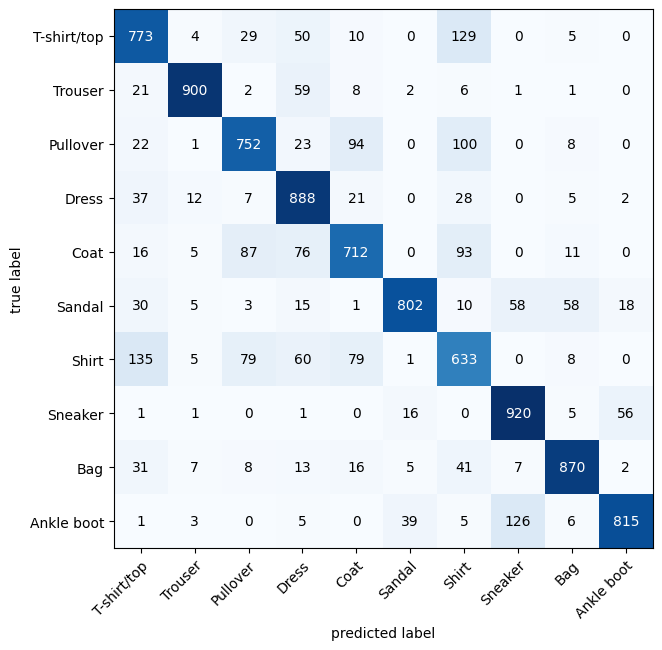

In [200]:
fig, axis = plot_confusion_matrix(conf_mat=confmat_tensor.numpy(),
                                  class_names = class_name,
                                  figsize = (10,7),
                                  )

Saving and loading our best model

In [202]:
from pathlib import Path

Model_path = Path("model2")
Model_path.mkdir(parents = True, exist_ok = True)
Model_name = "model.pth"
model_save_path= Model_path/Model_name

print(f"saving model for {model_save_path}")
torch.save(obj = model_2.state_dict(),
           f = model_save_path)


saving model for model2/model.pth


In [203]:
torch.manual_seed(42)

loaded_model = FashionMNISTModelV2(input_shape =1,
                                   hidden_units = 10,
                                   output_shape = len(class_name)
                                   )

loaded_model.load_state_dict(torch.load(f = model_save_path))

<All keys matched successfully>

In [204]:
loaded_model.to(device)

FashionMNISTModelV2(
  (conv_block1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [208]:
loaded_model_results = eval_model(model = loaded_model,data_loader = test_data_loader,
           loss_fn = loss_fn, accuracy_fn = accuracy_fn)

In [209]:
loaded_model_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.30092281103134155,
 'model_acc': 89.48682108626198,
 'precision': 0.8944361784696526,
 'recall': 0.8949,
 'f1': 0.8936009780482685}

In [210]:
model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.30092281103134155,
 'model_acc': 89.48682108626198,
 'precision': 0.8944361784696526,
 'recall': 0.8949,
 'f1': 0.8936009780482685}